In [1]:
import numpy as np
import pandas as pd
import re
from scipy.stats import norm

from matplotlib import pyplot as plt
from data_util import create_dataset
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 100
pd.set_option('display.max_rows', None)

In [3]:
# Read in new data
filepath_new = 'mmc1-tony.xlsx'
data_new = pd.read_excel(filepath_new,index_col=0)

In [4]:
data_BRCA_bone = create_dataset(cancer_type = 'BRCA',
                                new_tumor_event_site = 'Bone',
                                data_new = data_new,
                                filepath_ge = 'BRCA/TCGA-BRCA.htseq_fpkm.tsv',
                                filepath_ph = 'BRCA/TCGA-BRCA.GDC_phenotype.tsv')

In [6]:
data_BRCA_bone['sample_type.samples']

sample_id
TCGA-E9-A1N6-01A          Primary Tumor
TCGA-E9-A1N6-11A    Solid Tissue Normal
TCGA-E2-A14Z-01A          Primary Tumor
TCGA-AC-A2QJ-01A          Primary Tumor
TCGA-AR-A2LH-01A          Primary Tumor
TCGA-B6-A0WX-01A          Primary Tumor
TCGA-BH-A0C3-11A    Solid Tissue Normal
TCGA-BH-A0C3-01A          Primary Tumor
TCGA-A2-A25B-01A          Primary Tumor
TCGA-E2-A10A-01A          Primary Tumor
TCGA-LQ-A4E4-01A          Primary Tumor
TCGA-B6-A3ZX-01A          Primary Tumor
TCGA-HN-A2OB-01A          Primary Tumor
TCGA-B6-A0IE-01A          Primary Tumor
TCGA-AR-A2LK-01A          Primary Tumor
TCGA-E9-A226-01A          Primary Tumor
TCGA-AR-A0TY-01A          Primary Tumor
TCGA-B6-A0WZ-01A          Primary Tumor
TCGA-GM-A2DA-01A          Primary Tumor
TCGA-A2-A0EW-01A          Primary Tumor
TCGA-AR-A0U2-01A          Primary Tumor
TCGA-E9-A243-01A          Primary Tumor
TCGA-GM-A2D9-01A          Primary Tumor
TCGA-A2-A04P-01A          Primary Tumor
TCGA-AO-A0J9-01A          Prim

In [11]:
sum(data_breast_ph['sample_type.samples']=='Solid Tissue Normal')

162

In [129]:
# Get breast cancer data with new tumor site in bone
data_BRCA_bone = create_dataset(cancer_type = 'BRCA', new_tumor_event_site = 'Bone', data_new = data_new, filepath_ge='BRCA/TCGA-BRCA.htseq_fpkm.tsv')

In [578]:
# Get head-neck squamous cell carcinoma data with new tumor site in oral cavity
data_HNSC_oral = create_dataset(cancer_type = 'HNSC', new_tumor_event_site = 'Oral Cavity', data_new = data_new)

In [586]:
# Get melanoma (skin cancer) data with new tumor site in lung
data_SKCM_lung = create_dataset(cancer_type = 'SKCM', new_tumor_event_site = 'Lung', data_new = data_new)

In [587]:
# Get head-neck squamous cell carcinoma data with new tumor site in liver
data_STAD_liver = create_dataset(cancer_type = 'STAD', new_tumor_event_site = 'Liver', data_new = data_new)

In [ ]:
# Get bladder cancer data with new tumor site in lung
data_BLCA_lung = create_dataset(cancer_type = 'BLCA', new_tumor_event_site = 'Lung', data_new = data_new)

In [570]:
# Get sarcoma data with new tumor site in lung
data_SARC_lung = create_dataset(cancer_type = 'SARC', new_tumor_event_site = 'Lung', data_new = data_new)

In [572]:
# Get pancreatic cancer data with new tumor site in lung
data_PAAD_liver = create_dataset(cancer_type = 'PAAD', new_tumor_event_site = 'Liver', data_new = data_new)

## Data Cleaning

Split into X and Y

In [14]:
X_df = data_BRCA_bone.drop(columns=['sample_id','bcr_patient_barcode','new_tumor_event_site'])

Gene expression data has already been log transformed. More specifically, the gene expression data is log_2(x+1) of the original data
First, we will standardize the log transformed data.

### Standardization

In [30]:
scaler = StandardScaler()
scaler.fit_transform(X_df)
X_scaled = scaler.transform(X_df)
scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [84]:
dist_test = norm(loc=mean_vec[0],scale=var_vec[0])

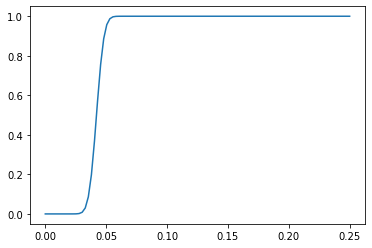

In [110]:
plt.plot(np.linspace(0,.25,100),dist_test.cdf(np.linspace(0,.25,100)))

In [125]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X_df.columns
X_scaled.index = X_df.index
mean_vec = scaler.mean_
var_vec = scaler.var_
cutoff_num = 6
cutoff_prob=.95
drop_vec = []
# zeros_vec = []
for ii in range(len(mean_vec)):
    mean = mean_vec[ii]
    variance = var_vec[ii]
    distribution = norm(loc=mean,scale=variance)
    cum_prob = distribution.cdf(cutoff_num)
    if np.isnan(cum_prob) or cum_prob >= cutoff_prob:
        drop_vec.append(ii)
#     if (mean_vec[ii] == 0) & (var_vec[ii] == 0):
#         zeros_vec.append(ii)
    else:
        pass

In [127]:
len(set(drop_vec).intersection(set(zeros_vec)))

9441

In [126]:
X_cut = X_scaled.drop(X_scaled.columns[drop_vec],axis=1)
X_cut.shape

(36, 1497)

In [57]:
# Remove columns with mean 0
cols_to_drop = mean_list[mean_list < 6].index
data_BRCA_bone.drop(columns = cols_to_drop, inplace=True)

# Confirm that std of selected columns is also 0
# std_list[mean_list==0]

NameError: name 'mean_list' is not defined

In [79]:
mean_list = data_BRCA_bone.mean()
std_list = data_BRCA_bone.std()

# np.mean(std_list), np.std(std_list)
# np.mean(mean_list), np.std(mean_list)

In [ ]:
hist, bin_edges = np.histogram(mean_list,bins=100)
plt.plot(bin_edges[1:],np.cumsum(hist))

In [ ]:
plt.hist(mean_list)

In [ ]:
mean_list.describe()

In [ ]:
X = data_BRCA_bone.drop(columns = ['sample_id','bcr_patient_barcode','new_tumor_event_site'])

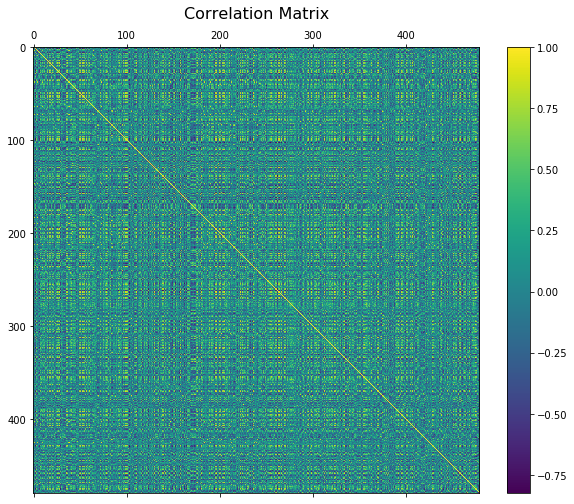

In [762]:
f = plt.figure(figsize=(10, 8))
plt.matshow(X.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=16);

In [766]:
X = X.to_numpy()

In [780]:
xtx = (X-np.mean(X,0)).T@(X-np.mean(X,0))
eigval,eigvec = np.linalg.eigh(xtx)


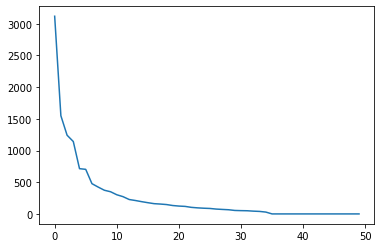

In [784]:
plt.plot(np.flip(eigval)[0:50])

In [800]:
components = eigvec[-1][np.absolute(eigvec[-1])>.05]

In [801]:
np.sum(np.multiply(components,components))

0.7681695560890759

In [128]:
# Get counts of new tumor sites of each type of cancers

for cancer_type in data_new['type'].unique():
    data_test = data_new[data_new['type'] == cancer_type]
    print(cancer_type)
    print(data_test['new_tumor_event_site'].value_counts())
    print('=========================')

ACC
Lung                           18
Peritoneal Surfaces             7
Liver                           7
Other, specify                  4
Bone                            3
Soft Tissue                     2
Retroperitoneal lymph nodes     1
Lymph Node(s)                   1
Name: new_tumor_event_site, dtype: int64
BLCA
Other, specify     38
Lung               31
Bone               21
Lymph Node Only    21
Liver              12
Bladder            11
Renal Pelvis        5
Urethra             1
Name: new_tumor_event_site, dtype: int64
BRCA
Other, specify    34
Bone              34
Lung              15
Liver              6
Brain              3
Name: new_tumor_event_site, dtype: int64
CESC
Other, specify    19
Lung               8
Cervix             4
Head & Neck        3
Vulva              1
Name: new_tumor_event_site, dtype: int64
CHOL
Liver                                 9
Other, specify                        3
Bone                                  2
Lung                              

In [8]:
# # Phenotype data

# # Breast Cancer
filepath_breast_ph = 'BRCA/TCGA-BRCA.GDC_phenotype.tsv'
data_breast_ph = pd.read_csv(filepath_breast_ph, delimiter = '\t')

# # Bladder Cancer
# filepath_bladder_ph = 'Bladder/TCGA-BLCA.GDC_phenotype.tsv'
# data_bladder_ph = pd.read_csv(filepath_bladder_ph,delimiter = '\t')

# # Cervical Cancer
# filepath_cervical_ph = 'Cervical/TCGA-CESC.GDC_phenotype.tsv'
# data_cervical_ph = pd.read_csv(filepath_cervical_ph,delimiter = '\t')

# # Colon Cancer
# filepath_colon_ph = 'Colon/TCGA-COAD.GDC_phenotype.tsv'
# data_colon_ph = pd.read_csv(filepath_colon_ph,delimiter = '\t')

# # Melanoma Cancer
# filepath_melanoma_ph = 'Melanoma/TCGA-SKCM.GDC_phenotype.tsv'
# data_melanoma_ph = pd.read_csv(filepath_melanoma_ph,delimiter = '\t')

# # Prostate Cancer
# filepath_prostate_ph = 'Prostate/TCGA-PRAD.GDC_phenotype.tsv'
# data_prostate_ph = pd.read_csv(filepath_prostate_ph,delimiter = '\t')

# # Rectal Cancer
# filepath_rectal_ph = 'Rectal/TCGA-READ.GDC_phenotype.tsv'
# data_rectal_ph = pd.read_csv(filepath_rectal_ph,delimiter = '\t')

In [ ]:
# # Get counts of types of sample, either tumor, normal or metastatic
# data_ph['sample_type.samples'].value_counts()

# # Get counts of nulls
# data_ph['sample_type.samples'].isnull().sum()

In [137]:
data_breast_ph[data_breast_ph['sample_type.samples']=='Solid Tissue Normal'].head()

,submitter_id.samples,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,additional_surgery_metastatic_procedure,age_at_initial_pathologic_diagnosis,axillary_lymph_node_stage_method_type,axillary_lymph_node_stage_other_method_descriptive_text,batch_number,bcr,...,days_to_collection.samples,days_to_sample_procurement.samples,initial_weight.samples,is_ffpe.samples,oct_embedded.samples,preservation_method.samples,sample_type.samples,sample_type_id.samples,state.samples,tissue_type.samples
6,TCGA-BH-A1F0-11B,NaN,NaN,NaN,NaN,80.0,NaN,NaN,103.79.0,Nationwide Children's Hospital,...,3879.0,NaN,180.0,False,false,NaN,Solid Tissue Normal,11.0,released,Not Reported
8,TCGA-BH-A0BZ-11A,NaN,NaN,NaN,NaN,59.0,NaN,NaN,96.80.0,Nationwide Children's Hospital,...,1084.0,NaN,620.0,False,true,NaN,Solid Tissue Normal,11.0,released,Not Reported
10,TCGA-AC-A2FM-11B,NaN,NaN,NaN,NaN,87.0,Sentinel node biopsy alone,NaN,185.70.0,Nationwide Children's Hospital,...,2733.0,NaN,220.0,False,false,NaN,Solid Tissue Normal,11.0,released,Not Reported
26,TCGA-AC-A23G-11A,NaN,NaN,NaN,NaN,76.0,NaN,NaN,202.70.0,Nationwide Children's Hospital,...,1590.0,NaN,80.0,False,false,NaN,Solid Tissue Normal,11.0,released,Not Reported
28,TCGA-BH-A0DE-11A,NaN,NaN,NaN,NaN,62.0,NaN,NaN,85.86.0,Nationwide Children's Hospital,...,1130.0,NaN,150.0,False,true,NaN,Solid Tissue Normal,11.0,released,Not Reported


In [149]:
data_ph_subset = data_breast_ph[['submitter_id.samples','sample_type.samples']]
data_ph_subset = data_ph_subset.rename(columns={'submitter_id.samples': 'sample_id'});